# What makes a good movie?

Our stakeholder **Microsoft** has asked us to explore what different types of films are currently doing best at the box office so that they can make better decisions on what types of films to create.

## Abstract

Stakeholders looking to create profitable movie titles could use this paper to identify what movie genres provide the highest return on investment, what is optimal film reach, and which directors (if any) are most likely to provide a healthy return on investment. We address what attributes successful movie titles had over the last decade by applying a qualitative analysis to data gathered from IMDb's public database available for download at `https://datasets.imdbws.com`

IMDb is an online database of information related to films, television programs, home videos, video games, and streaming content online and is now owned and operated by Amazon.com so the accuracy of this data can be trusted with a high degree of certainty.

The scope of this our analysis is limited to two axes of examination, profits, revenues and roi as they relate to movie genres - both foreign and domestic - and as they relate to director.

### How did we process our data?

We decided to use data cleaning note book separately of this paper to reduce pysical ram requirements and to streamline this paper. For a step by step run down on the processing of the data.



## Importing the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
#this feature reads the cleaned data file contained in the Data directory
df = pd.read_csv('final-data.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

#doing this here and not during data cleaning because this split doesnt survive being saved as .csv
df['genres'] = df['genres'].map(lambda x: x.split(","))
df['director'] = df['director'].map(lambda x: x.split(","))
df.info()

# Q2 function to chart DF's
def Q2_plot_grapher(x, genre):
    plot = x.loc[:,['roi_domestic', 'roi_foreign']].plot()
    plt.xlabel('Release Year')
    plt.ylabel('ROI %')
    plt.title(genre + ' Genre')
    plt.xticks([2012, 2014, 2016, 2018, 2020])
    plot.set_xticklabels(['2012', '2014', '2016', '2018', '2020'])
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);
    return plot

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       1311 non-null   object 
 1   movie              1311 non-null   object 
 2   production_budget  1311 non-null   int64  
 3   domestic_gross     1311 non-null   int64  
 4   worldwide_gross    1311 non-null   int64  
 5   foreign_gross      1311 non-null   int64  
 6   profit             1311 non-null   int64  
 7   release_year       1311 non-null   int64  
 8   genres             1311 non-null   object 
 9   director           1311 non-null   object 
 10  roi_domestic       1311 non-null   float64
 11  roi_foreign        1311 non-null   float64
 12  roi_worldwide      1311 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 133.3+ KB


## Data Understanding

All features in this analysis use the same dataset provided by our `Data/data-clean.ipynb` file which processes the raw data from zip format into a more readily usable csv file.

Each of our 1311 recrods contains information about the movie's year of release, production budget, gross revenues both foreign and domestic, profit, ROI, and director.

Note that movie release year has been filtered to only show films released in the last ten years.

In [3]:
df[['production_budget','worldwide_gross','profit','roi_worldwide']].describe()

,production_budget,worldwide_gross,profit,roi_worldwide
count,1.311000e+03,1.311000e+03,1.311000e+03,1311.000000
mean,4.535077e+07,1.443545e+08,9.900370e+07,270.736950
std,5.700625e+07,2.399941e+08,1.985670e+08,1267.217927
min,1.500000e+04,0.000000e+00,-2.002376e+08,-100.000000
25%,8.000000e+06,7.631223e+06,-9.080450e+05,-33.866839
50%,2.500000e+07,5.180076e+07,2.295647e+07,111.524436
75%,5.800000e+07,1.607652e+08,1.083781e+08,303.565585
max,4.106000e+08,2.048134e+09,1.748134e+09,41556.474000


### Business Question 1: Which genres of movies can expect a higher return on investment?

Based on our business problem, we decided to first examine which genres these new films should be. We chose to do this by calculating the average return on investment for each genre and pulled the top 5 genres.

>We've chosen to use median because the data contains many outliers which would make the mean a non-optimal measure of central tendency. We'll be choosing the top 5 genres based on their worlwide ROI, since this is a better indication of each films total ROI.

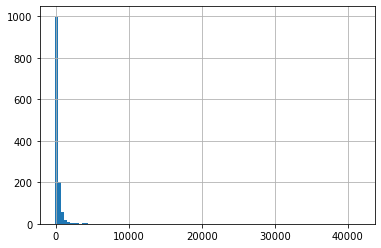

In [4]:
df['roi_worldwide'].hist(bins=100);

###### Now with that said, we examine the median ROI for each genre. 


In [5]:
#the genres for each movie are in a list. I need to seperate the genres so i can perform further analysis
genres_exp = df.explode('genres')
unique_genres = list(genres_exp['genres'].unique())

#We create a new dataframe that displays median by genre in descending order
genres_gb = genres_exp.groupby('genres').median().sort_values(by=['roi_worldwide'], ascending=False)

#take the top five and roi_worldwide
top_5_genres_roi = genres_gb[['roi_worldwide']].head(5)
top_5_genres_roi

,roi_worldwide
genres,
Mystery,227.818077
Animation,198.188978
Musical,173.752303
Sci-Fi,168.386218
Adventure,162.363957


> ##### Great, let's see the  median worldwide roi's visually

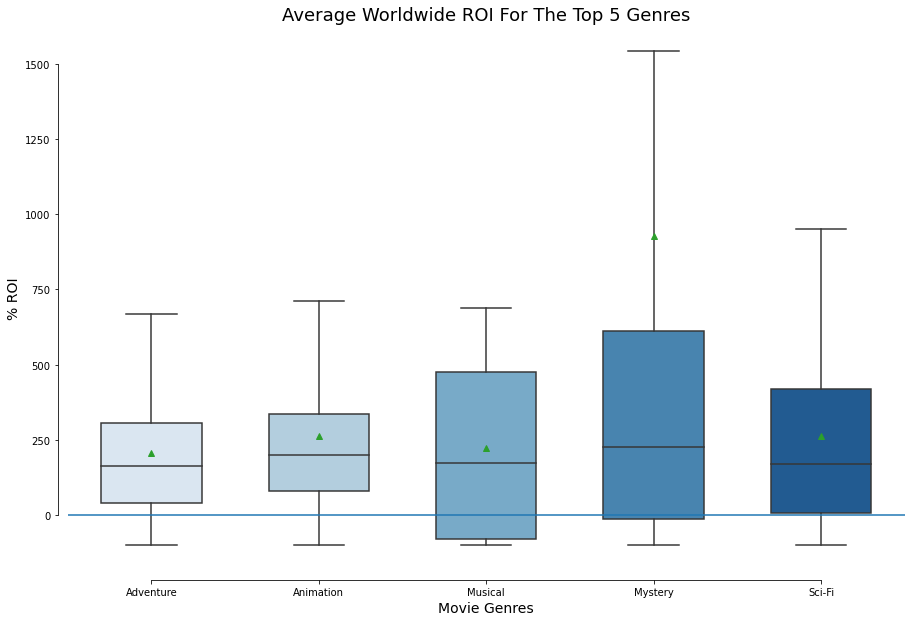

In [6]:
#creating an individual dataframe for each genre in my genres_gb dataframe
genres = genres_exp['genres'].unique().tolist()
musical = genres_exp.loc[genres_exp.genres=='Musical']
mystery = genres_exp.loc[genres_exp.genres=='Mystery']
scifi = genres_exp.loc[genres_exp.genres=='Sci-Fi']
adventure = genres_exp.loc[genres_exp.genres=='Adventure']
animation = genres_exp.loc[genres_exp.genres=='Animation']

#create a new dataframe with the top five average roi worldwide
top_5_ww = adventure.append(animation)
top_5_ww = top_5_ww.append(musical)
top_5_ww = top_5_ww.append(mystery)
top_5_ww = top_5_ww.append(scifi)


#create a box plot with all 5 top genres comparing median and mean
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
graph = sns.boxplot( 
        x=top_5_ww['genres'], 
        y=top_5_ww['roi_worldwide'], 
        palette='Blues', 
        width=0.6, 
        showfliers=False, 
        showmeans =True
    );


plt.ylabel('% ROI', size=14)
plt.xlabel('Movie Genres', size=14)
plt.title('Average Worldwide ROI For The Top 5 Genres', size=18)
ax.yaxis.grid(False) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Hide the vertical gridlines

graph.axhline(0) #create a line at 0% to clearly show which genres 25th percentile is negative

sns.despine(offset=10, trim=True)
plt.show()

In [7]:
#let's predict worst, base, and best case scenarios for each genre
arr = adventure['roi_worldwide']
arr2 = animation['roi_worldwide']
arr3 = musical['roi_worldwide']
arr4 = mystery['roi_worldwide']
arr5 = scifi['roi_worldwide']
print(f'Adventure ROI: \n  Worst Case = {int(np.percentile(arr, 25))}% \n  Base Case = {int(np.percentile(arr, 50))}% \n  Best Case = {int(np.percentile(arr, 75))}%')
print(f'Animation ROI: \n  Worst Case = {int(np.percentile(arr2, 25))}% \n  Base Case = {int(np.percentile(arr2, 50))}% \n  Best Case = {int(np.percentile(arr2, 75))}%')
print(f'Musical ROI: \n  Worst Case = {int(np.percentile(arr3, 25))}% \n  Base Case = {int(np.percentile(arr3, 50))}% \n  Best Case = {int(np.percentile(arr3, 75))}%')
print(f'Mystery ROI: \n  Worst Case = {int(np.percentile(arr4, 25))}% \n  Base Case = {int(np.percentile(arr4, 50))}% \n  Best Case = {int(np.percentile(arr4, 75))}%')
print(f'Sci-fi ROI: \n  Worst Case = {int(np.percentile(arr5, 25))}% \n  Base Case = {int(np.percentile(arr5, 50))}% \n  Best Case = {int(np.percentile(arr5, 75))}%')

Adventure ROI: 
  Worst Case = 41% 
  Base Case = 162% 
  Best Case = 305%
Animation ROI: 
  Worst Case = 78% 
  Base Case = 198% 
  Best Case = 335%
Musical ROI: 
  Worst Case = -78% 
  Base Case = 173% 
  Best Case = 474%
Mystery ROI: 
  Worst Case = -13% 
  Base Case = 227% 
  Best Case = 613%
Sci-fi ROI: 
  Worst Case = 5% 
  Base Case = 168% 
  Best Case = 420%


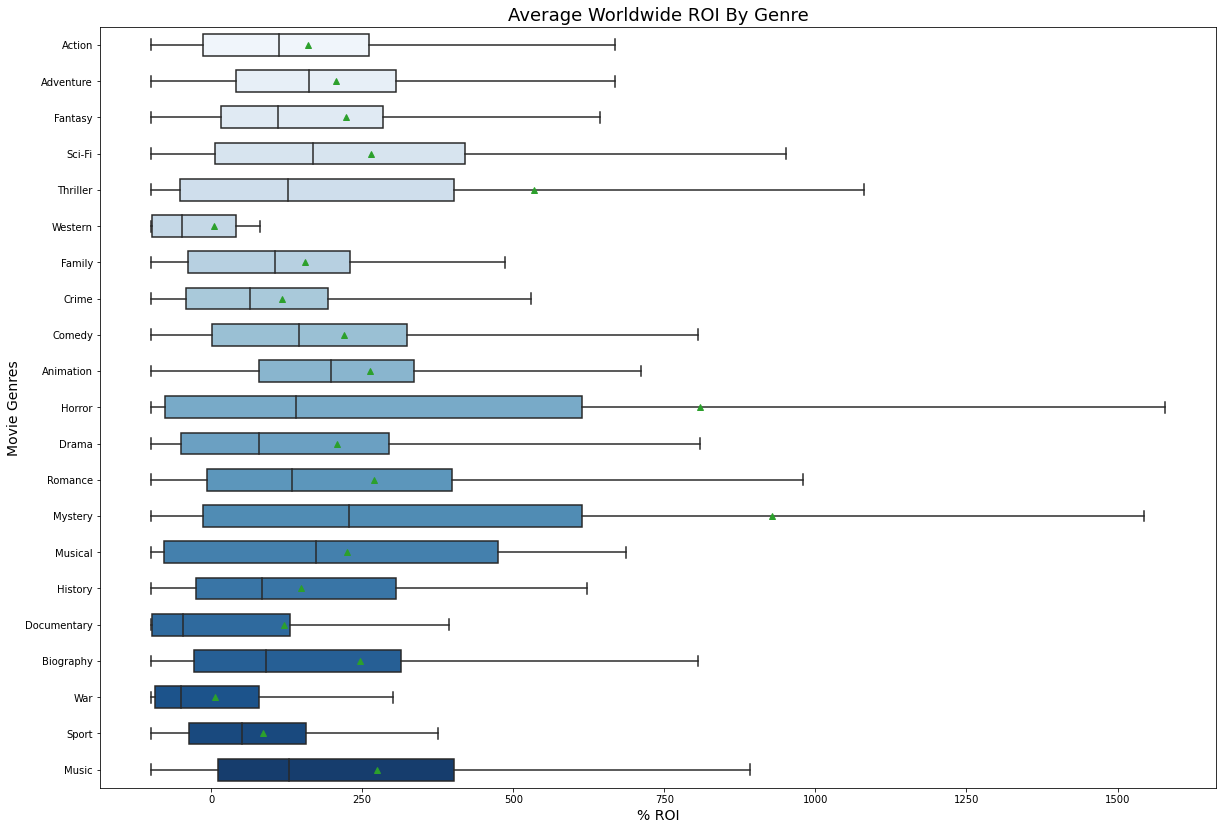

In [8]:
#creating a boxplot with the median and IQR for each genre
fig_dims = (20, 14)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot( y=genres_exp["genres"], 
            x=genres_exp["roi_worldwide"], 
            palette="Blues", 
            width=0.6, 
#removing outliers
            showfliers = False,
#adding a green dot that shows mean for each genre
            showmeans = True);

#creating labels for my boxplot
plt.xlabel("% ROI", size=14)
plt.ylabel("Movie Genres", size=14)
plt.title("Average Worldwide ROI By Genre", size=18)
plt.show()

We next decided to take a look at how each genre performed domestically, to see if it was necessary to release films in foreign countries. We were also curious to know if the top 5 genres in the USA were different than the top 5 genres worldwide

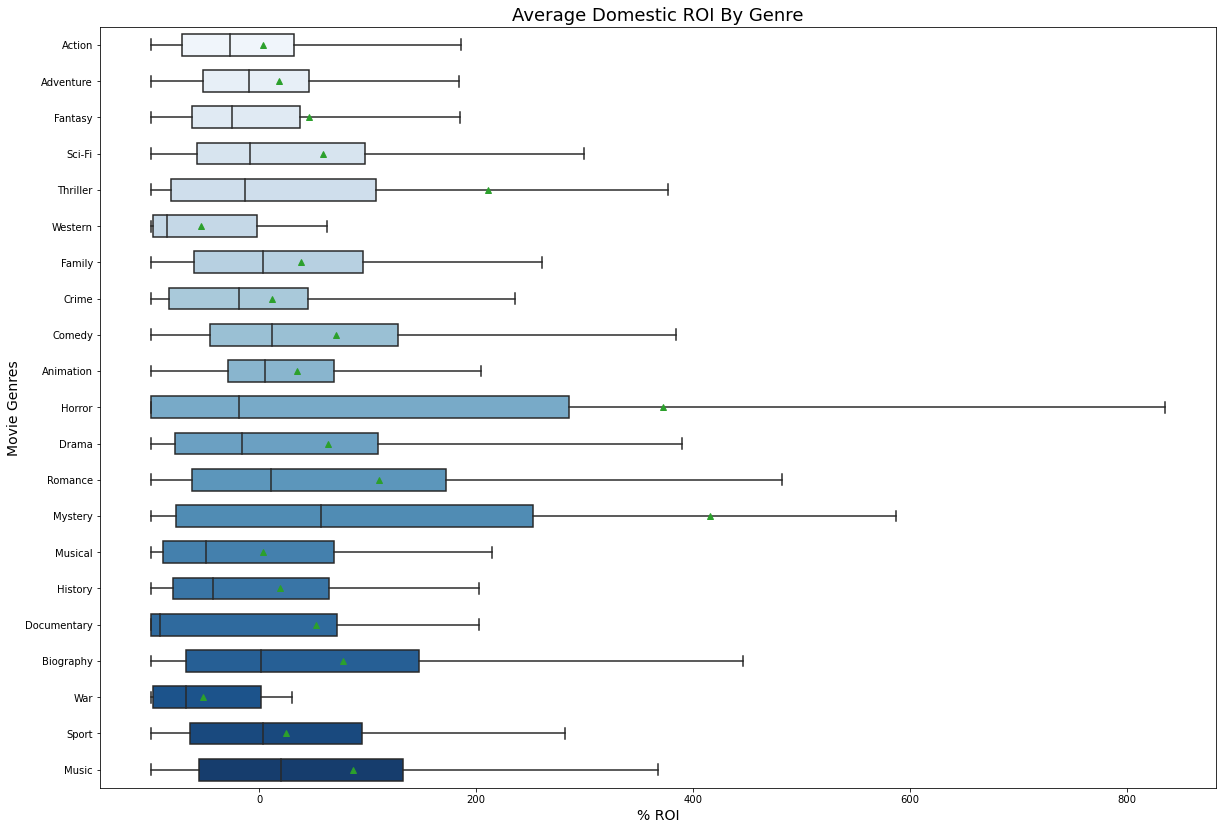

In [9]:
fig_dims = (20, 14)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot( y=genres_exp["genres"], 
            x=genres_exp["roi_domestic"], 
            palette="Blues", 
            width=0.6, 
            showfliers = False, 
            showmeans=True);

plt.xlabel("% ROI", size=14)
plt.ylabel("Movie Genres", size=14)
plt.title("Average Domestic ROI By Genre", size=18)
plt.show()

In [10]:
genres_gb_dom = genres_exp.groupby('genres').median()
genres_gb_dom = genres_gb.sort_values(by=['roi_domestic'], ascending=False)
genres_gb_dom[['roi_domestic']].head(5)

,roi_domestic
genres,
Mystery,56.965319
Music,20.438264
Comedy,11.473743
Romance,10.848518
Animation,5.784405


>It looks like our top 5 genres in the USA are different from our top 5 genres in the world. Only two genres (mystery and animation) are in the top 5 for domestic and worlwide ROI. 

We next wanted to see the worst, base, and best case ROI for the top 5 genres in the USA

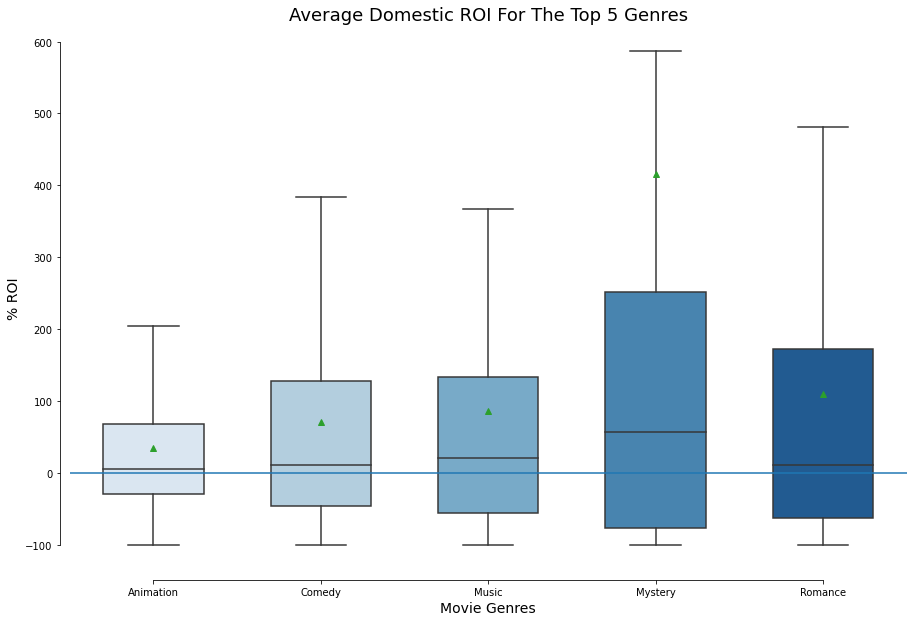

In [11]:
#isolate the remaining 
comedy = genres_exp.loc[genres_exp.genres=='Comedy']
music = genres_exp.loc[genres_exp.genres=='Music']
romance = genres_exp.loc[genres_exp.genres=='Romance']

#Create a dataframe for every genre in top 5 domestic 
top_5_df_domestic = animation.append(comedy)
top_5_df_domestic = top_5_df_domestic.append(music)
top_5_df_domestic = top_5_df_domestic.append(mystery)
top_5_df_domestic = top_5_df_domestic.append(romance)

#created a box plot with top 5 genres in roi_domestic based on median
fig_dims=(15, 10)
fig, ax=plt.subplots(figsize=fig_dims)
graph = sns.boxplot( x=top_5_df_domestic['genres'], 
            y=top_5_df_domestic['roi_domestic'], 
            palette='Blues', 
            width=0.6, 
            showfliers=False, 
            showmeans=True,
            data = top_5_df_domestic.groupby('roi_domestic', as_index=False).median()
    );

plt.ylabel('% ROI', size=14)
plt.xlabel('Movie Genres', size=14)
plt.title('Average Domestic ROI For The Top 5 Genres', size=18)
#sns.stripplot(x="genres", y="roi_domestic", data=top_5_df_domestic)

ax.yaxis.grid(False) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Show the vertical gridlines

graph.axhline(0) #create a line at 0% to clearly show which genres 25th percentile is negative

sns.despine(offset=10, trim=True)
plt.show()

In [12]:
#let's predict worst, base, and best case scenarios for each genre
arr = animation['roi_domestic']
arr2 = comedy['roi_domestic']
arr3 = music['roi_domestic']
arr4 = mystery['roi_domestic']
arr5 = romance['roi_domestic']
print(f'Animation ROI: \n  Worst Case = {int(np.percentile(arr, 25))}% \n  Base Case = {int(np.percentile(arr, 50))}% \n  Best Case = {int(np.percentile(arr, 75))}%')
print(f'Comedy ROI: \n  Worst Case = {int(np.percentile(arr2, 25))}% \n  Base Case = {int(np.percentile(arr2, 50))}% \n  Best Case = {int(np.percentile(arr2, 75))}%')
print(f'Music ROI: \n  Worst Case = {int(np.percentile(arr3, 25))}% \n  Base Case = {int(np.percentile(arr3, 50))}% \n  Best Case = {int(np.percentile(arr3, 75))}%')
print(f'Mystery ROI: \n  Worst Case = {int(np.percentile(arr4, 25))}% \n  Base Case = {int(np.percentile(arr4, 50))}% \n  Best Case = {int(np.percentile(arr4, 75))}%')
print(f'Romance ROI: \n  Worst Case = {int(np.percentile(arr5, 25))}% \n  Base Case = {int(np.percentile(arr5, 50))}% \n  Best Case = {int(np.percentile(arr5, 75))}%')

Animation ROI: 
  Worst Case = -28% 
  Base Case = 5% 
  Best Case = 68%
Comedy ROI: 
  Worst Case = -45% 
  Base Case = 11% 
  Best Case = 127%
Music ROI: 
  Worst Case = -55% 
  Base Case = 20% 
  Best Case = 133%
Mystery ROI: 
  Worst Case = -76% 
  Base Case = 56% 
  Best Case = 252%
Romance ROI: 
  Worst Case = -61% 
  Base Case = 10% 
  Best Case = 172%


##### From what we see in the graphs above and based on worst, base, and best case scenarios for each genre, we should create films in the adventure and animation genres. 

>Although their best case ROI predictions are not as high as the mystery and musical genres, their worst case ROI predications are both far above 0%. All movies, no matter the genre, should be released worldwide and not just domestically, the worst case ROI predictions for each of the top 5 genres with highest average domestic ROI is below -25%.

### Business Question 2: Does the average ROI by genre follow a similar trend when compared between domestic and foreign markets?

In [13]:
genres_exp['genres'].value_counts()

Drama          635
Comedy         439
Action         402
Adventure      318
Thriller       234
Crime          208
Horror         163
Romance        146
Biography      123
Sci-Fi         123
Mystery        115
Fantasy        105
Animation       94
Family          72
Music           41
History         40
Documentary     31
Sport           30
War             15
Western          9
Musical          6
Name: genres, dtype: int64

In [14]:
# determine top 5 genres (ROI-worldwide) by creating a new dataframe and include foreign and domestic ROI
top_5_genres_roi = genres_exp[['genres', 'roi_domestic', 'roi_foreign','roi_worldwide']].copy()

# group dataframe by genres and calculate median
genres_gb = top_5_genres_roi.groupby('genres').median()

#Sort in descending order by WORLDWIDE ROI
roi_genres = genres_gb.sort_values(by=['roi_worldwide'], ascending=False)
roi_genres.head(10)

,roi_domestic,roi_foreign,roi_worldwide
genres,,,
Mystery,56.965319,55.904993,227.818077
Animation,5.784405,83.082221,198.188978
Musical,-49.429681,42.465095,173.752303
Sci-Fi,-8.206552,69.339398,168.386218
Adventure,-8.951864,53.815107,162.363957
Comedy,11.473743,-11.529117,144.709156
Horror,-18.290033,10.571580,139.973975
Romance,10.848518,-19.633567,133.868173
Music,20.438264,-38.546933,128.700183


<AxesSubplot:title={'center':'Top 5 Genre'}, xlabel='Release Year', ylabel='ROI %'>

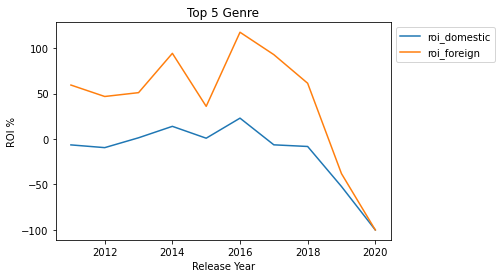

In [15]:
#Create ROI domestic and foreign table for reference

q2_overall = genres_exp.loc[genres_exp['genres'].isin(['Mystery', 'Animation', 'Musical', 'Sci-Fi', 'Adventure'])]                                                     
q2_overall = q2_overall.groupby('release_year').median()

Q2_plot_grapher(q2_overall, 'Top 5')

In [16]:
#use the individual dataframes created for question 1 and group by year
mys2 = mystery.groupby('release_year').median()

ani2 = animation.groupby('release_year').median()

mus2 = musical.groupby('release_year').median()

scifi2 = scifi.groupby('release_year').median()

adv2 = adventure.groupby('release_year').median()

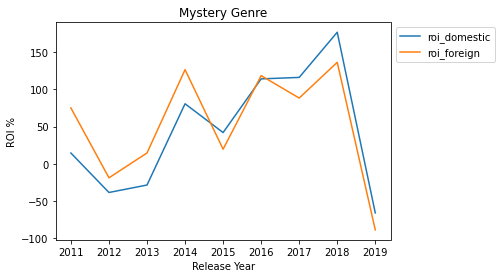

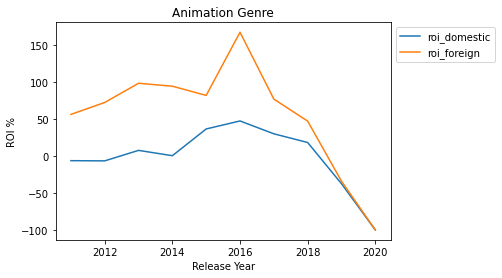

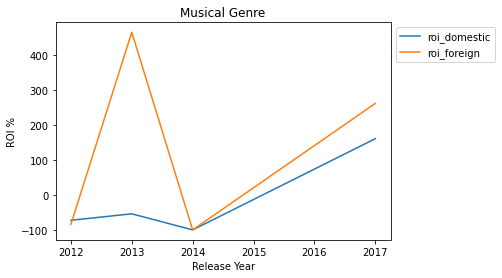

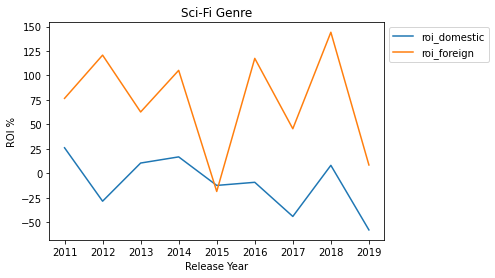

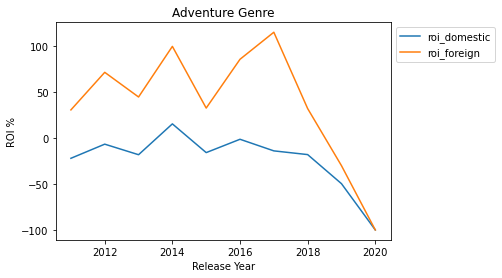

In [17]:
# plot the dataframes for each genre in our top 5 using the Q2_plot_grapher func

Q2_plot_grapher(mys2, 'Mystery')

Q2_plot_grapher(ani2, 'Animation')

Q2_plot_grapher(mus2, 'Musical')

Q2_plot_grapher(scifi2, 'Sci-Fi')

Q2_plot_grapher(adv2, 'Adventure');

##### The average ROI for the top 5 genres over the past decade shows that there is a bigger return on investment in the foreign market vs. domestic.

Based on this section of the analysis, Microsoft's movie studios should focus on producing adventure, sci-fi, and animation movies because of their greater foreign ROI potential.

>Adventure, sci-fi, animation, and musical movies performed better overseas than they did in the United States. The mystery Genre's domestic and foreign ROI follow the same general positive trend over time. Each genre's domestic ROI hovers around 0% except for Mystery movies that generally maintains a postive trajectory. There are a few outliers in the musical and mystery genre, but the foreign ROI generally performs better than the domestic ROI. 

### Business Question 3:  

##### Who are our potential directors? Is there any particular director who appears frequently in the successful movies. What kind of genres do these directors make?

After discovering the relationship between movie genres and movies' success, we were curious if there was any particular director who appeared frequently in the successful movies and what genres they were good at making. 

To answer this, we will first look at the top 10 movies by profit. 

The first step will be preparing a new dataframe that has only the necessary columns. Then, we will find and visualize the top movies sorted by profit.

In [18]:
# Keeping only the necessary columns
q3_df = df.loc[:, ['movie', 'profit', 'genres', 'director']]
q3_df

,movie,profit,genres,director
0,Pirates of the Caribbean: On Stranger Tides 2011,635063875,"[Action, Adventure, Fantasy]",[Rob Marshall]
1,Dark Phoenix 2019,-200237650,"[Action, Adventure, Sci-Fi]",[Simon Kinberg]
2,Avengers: Age of Ultron 2015,1072413963,"[Action, Adventure, Sci-Fi]",[Joss Whedon]
3,Avengers: Infinity War 2018,1748134200,"[Action, Adventure, Sci-Fi]","[Anthony Russo, Joe Russo]"
4,Justice League 2017,355945209,"[Action, Adventure, Fantasy]",[Zack Snyder]
...,...,...,...,...
1306,Emily 2017,-23453,[Drama],[Ryan Graves]
1307,Exeter 2015,464792,"[Horror, Mystery, Thriller]",[Marcus Nispel]
1308,Dutch Kills 2015,-25000,"[Crime, Drama, Thriller]",[Joseph Mazzella]
1309,The Ridges 2011,-17300,"[Drama, Horror, Thriller]",[Brandon Landers]


In [19]:
# Finding the top 10 movies by 'profit'
top10_profit = q3_df.sort_values(by='profit', ascending=False).head(10)
top10_profit = top10_profit.set_index('movie')
top10_profit

,profit,genres,director
movie,,,
Avengers: Infinity War 2018,1748134200,"[Action, Adventure, Sci-Fi]","[Anthony Russo, Joe Russo]"
Jurassic World 2015,1433854864,"[Action, Adventure, Sci-Fi]",[Colin Trevorrow]
Furious 7 2015,1328722794,"[Action, Crime, Thriller]",[James Wan]
The Avengers 2012,1292935897,"[Action, Adventure, Sci-Fi]",[Joss Whedon]
Black Panther 2018,1148258224,"[Action, Adventure, Sci-Fi]",[Ryan Coogler]
Jurassic World: Fallen Kingdom 2018,1135772799,"[Action, Adventure, Sci-Fi]",[J.A. Bayona]
Frozen 2013,1122469910,"[Adventure, Animation, Comedy]","[Chris Buck, Jennifer Lee]"
Beauty and the Beast 2017,1099199706,"[Family, Fantasy, Musical]",[Bill Condon]
Minions 2015,1086336173,"[Adventure, Animation, Comedy]","[Pierre Coffin, Kyle Balda]"


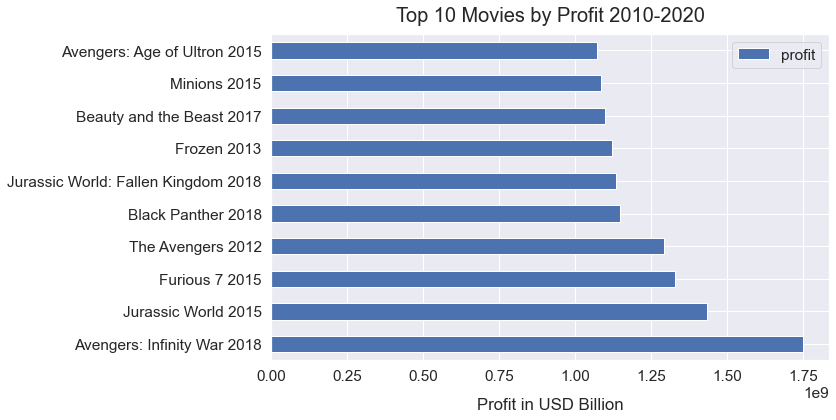

In [20]:
# Visualizing the top 10 movies by 'profit' 
sns.set(font_scale=1.4)
top10_profit.plot(
        kind='barh', 
        figsize=(10, 6), 
        rot=0
    );

plt.xlabel("Profit in USD Billion", labelpad=14)
plt.ylabel("")
plt.title("Top 10 Movies by Profit 2010-2020", y=1.02, fontsize=20);

We found out the top 10 movies by profit and their directors.  The dirctor, Joss Whedon, appeared the most (2 times) in the top 10 movies by profit. 

However, based on this result, it is difficult to say that there is any correlation between directors' experience and the movies' success. We want to go back and check the previous dataframe with all the movies and see if there is any correlation between them at all. 

>We will count the number of movies that each director made and calculate their total and average returns.  

Before investigating, we notice that the director column has nested lists. We would like to expand these so we have individaul director per row.

### Finding correlation between directors' performance and profit

In [21]:
# Creating a new dataframe 'individual_df' with 'director' column expanded to show individaul director per row
individual_df = q3_df.explode('director')
individual_df

,movie,profit,genres,director
0,Pirates of the Caribbean: On Stranger Tides 2011,635063875,"[Action, Adventure, Fantasy]",Rob Marshall
1,Dark Phoenix 2019,-200237650,"[Action, Adventure, Sci-Fi]",Simon Kinberg
2,Avengers: Age of Ultron 2015,1072413963,"[Action, Adventure, Sci-Fi]",Joss Whedon
3,Avengers: Infinity War 2018,1748134200,"[Action, Adventure, Sci-Fi]",Anthony Russo
3,Avengers: Infinity War 2018,1748134200,"[Action, Adventure, Sci-Fi]",Joe Russo
...,...,...,...,...
1306,Emily 2017,-23453,[Drama],Ryan Graves
1307,Exeter 2015,464792,"[Horror, Mystery, Thriller]",Marcus Nispel
1308,Dutch Kills 2015,-25000,"[Crime, Drama, Thriller]",Joseph Mazzella
1309,The Ridges 2011,-17300,"[Drama, Horror, Thriller]",Brandon Landers


In [22]:
# Counting movies made by each director
individual_df['director'].value_counts()

Tim Story           8
Steven Spielberg    7
Clint Eastwood      6
Ron Howard          5
Francis Lawrence    5
                   ..
Scott Hicks         1
Gavin Wiesen        1
Aleksander Bach     1
Alister Grierson    1
Gurinder Chadha     1
Name: director, Length: 1016, dtype: int64

In [23]:
# Creating a column that shows the number of movies made by the individual director
individual_df['#movies_by_director'] = individual_df.groupby(['director'])['movie'].transform('count')

In [24]:
# Creating columns that show the total profit and the average profit made by each director
individual_df['total_profit'] = individual_df.groupby(['director'])['profit'].transform('sum')
individual_df['avg_profit'] = individual_df.groupby(['director'])['profit'].transform('mean')
individual_df.head(10)

,movie,profit,genres,director,#movies_by_director,total_profit,avg_profit
0,Pirates of the Caribbean: On Stranger Tides 2011,635063875,"[Action, Adventure, Fantasy]",Rob Marshall,3,1003508794,3.345029e+08
1,Dark Phoenix 2019,-200237650,"[Action, Adventure, Sci-Fi]",Simon Kinberg,1,-200237650,-2.002376e+08
2,Avengers: Age of Ultron 2015,1072413963,"[Action, Adventure, Sci-Fi]",Joss Whedon,2,2365349860,1.182675e+09
3,Avengers: Infinity War 2018,1748134200,"[Action, Adventure, Sci-Fi]",Anthony Russo,3,3182605502,1.060869e+09
3,Avengers: Infinity War 2018,1748134200,"[Action, Adventure, Sci-Fi]",Joe Russo,3,3182605502,1.060869e+09
4,Justice League 2017,355945209,"[Action, Adventure, Fantasy]",Zack Snyder,4,1431203397,3.578008e+08
5,Spectre 2015,579620923,"[Action, Adventure, Thriller]",Sam Mendes,2,1490147904,7.450740e+08
6,The Dark Knight Rises 2012,809439099,"[Action, Thriller]",Christopher Nolan,3,1660655842,5.535519e+08
7,Solo: A Star Wars Story 2018,118151347,"[Action, Adventure, Fantasy]",Ron Howard,5,313141727,6.262835e+07
8,The Lone Ranger 2013,-14997885,"[Action, Adventure, Western]",Gore Verbinski,2,95726715,4.786336e+07


In [25]:
# Creating a new dataframe that shows the top 10 directors by their total profit
director_total = individual_df.loc[:, ['director', 'total_profit', '#movies_by_director', 'genres']]
director_total = director_total.drop_duplicates(subset='director')
director_total = director_total.set_index('director')
top10_director_total = director_total.sort_values(by='total_profit', ascending=False).head(10)
top10_director_total

,total_profit,#movies_by_director,genres
director,,,
Anthony Russo,3182605502,3,"[Action, Adventure, Sci-Fi]"
Joe Russo,3182605502,3,"[Action, Adventure, Sci-Fi]"
James Wan,2613617575,3,"[Action, Crime, Thriller]"
Joss Whedon,2365349860,2,"[Action, Adventure, Sci-Fi]"
Michael Bay,2263998250,4,"[Action, Adventure, Sci-Fi]"
Peter Jackson,2172948044,3,"[Adventure, Family, Fantasy]"
Pierre Coffin,2046063923,2,"[Adventure, Animation, Comedy]"
Kyle Balda,2046063923,2,"[Adventure, Animation, Comedy]"
Francis Lawrence,2021191543,5,"[Action, Adventure, Sci-Fi]"


In [26]:
# Checking correlation between the number of movies each director made and their total profit(performance)
director_total.corr()['#movies_by_director'].sort_values()

total_profit           0.479967
#movies_by_director    1.000000
Name: #movies_by_director, dtype: float64

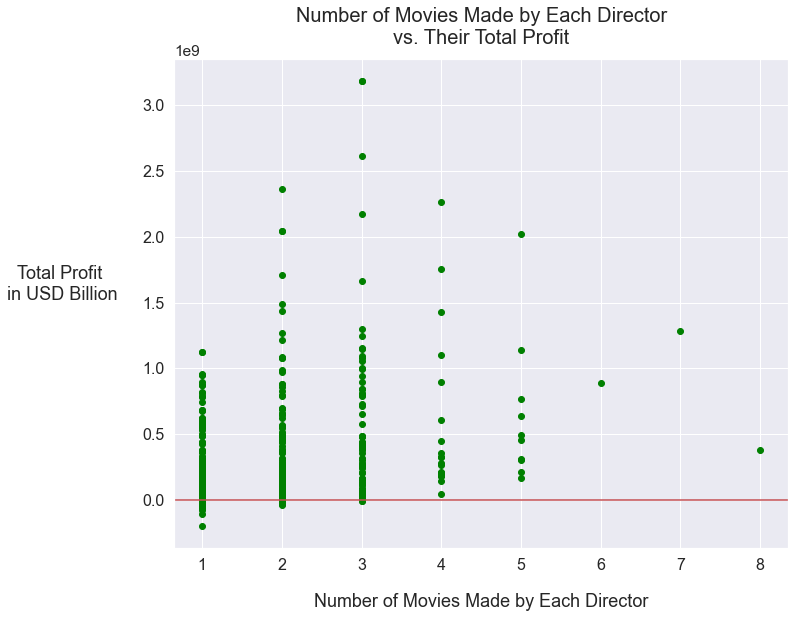

In [27]:
# Scatter plot of the relationship between the number of movies each director made and their total profit(performance)
fig, ax = plt.subplots(figsize=(11,9))

ax.scatter(director_total['#movies_by_director'], director_total['total_profit'], color="green")
ax.set_title("Number of Movies Made by Each Director\nvs. Their Total Profit", fontsize=20, pad=15)
ax.set_xlabel("Number of Movies Made by Each Director", fontsize=18, labelpad=20)
ax.set_ylabel("Total Profit \nin USD Billion", fontsize=18, labelpad=80, rotation=0);
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
ax.axhline(y=1, c='r');

With correlation being 0.50, we see that there is some correlation between the number of movies each director made and their total return. However, it also raises a question why the total profit goes up until the 3rd movies, but then it decreases after that point. This does not tell us a clear story. Thus, this time, we will check out the relationship between the number of movies each director made and their average return. 

In [28]:
# Creating a new dataframe that shows the top 10 directors by their average profit
director_avg = individual_df.loc[:, ['director', 'avg_profit', '#movies_by_director', 'genres']]
director_avg = director_avg.drop_duplicates(subset='director')
director_avg_index = director_avg.set_index('director')
top10_director_avg = director_avg_index.sort_values(by='avg_profit', ascending=False).head(10)
top10_director_avg

,avg_profit,#movies_by_director,genres
director,,,
Joss Whedon,1.182675e+09,2,"[Action, Adventure, Sci-Fi]"
Chris Buck,1.122470e+09,1,"[Adventure, Animation, Comedy]"
Jennifer Lee,1.122470e+09,1,"[Adventure, Animation, Comedy]"
Anthony Russo,1.060869e+09,3,"[Action, Adventure, Sci-Fi]"
Joe Russo,1.060869e+09,3,"[Action, Adventure, Sci-Fi]"
Kyle Balda,1.023032e+09,2,"[Adventure, Animation, Comedy]"
Pierre Coffin,1.023032e+09,2,"[Adventure, Animation, Comedy]"
Eric Guillon,9.597278e+08,1,"[Adventure, Animation, Comedy]"
Ryan Fleck,9.480616e+08,1,"[Action, Adventure, Sci-Fi]"


In [29]:
# Checking correlation between the number of movies each director made and their average profit(performance)
director_avg.corr()['#movies_by_director'].sort_values()

avg_profit             0.199965
#movies_by_director    1.000000
Name: #movies_by_director, dtype: float64

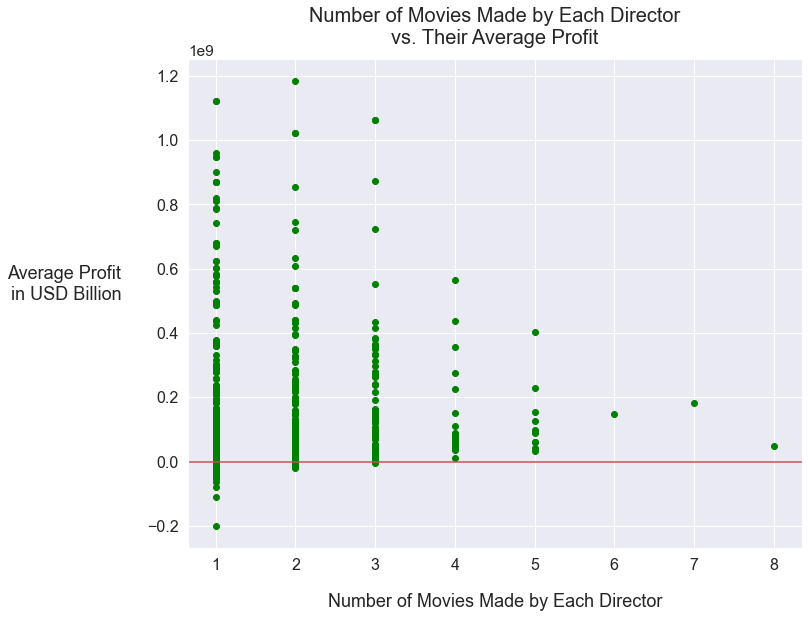

In [30]:
# Scatter plot of the relationship between the number of movies each director made and their average profit(performance)
fig, ax = plt.subplots(figsize=(11,9))

ax.scatter(director_avg['#movies_by_director'], director_avg['avg_profit'], color="green")
ax.set_title("Number of Movies Made by Each Director\nvs. Their Average Profit", fontsize=20, pad=15)
ax.set_xlabel("Number of Movies Made by Each Director", fontsize=18, labelpad=20)
ax.set_ylabel("Average Profit \nin USD Billion", fontsize=18, labelpad=80, rotation=0);
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
ax.axhline(y=1, c='r');

With correlation being 0.22, we see that there is no strong relationship between the number of movies each director made and their average return. However, we have a few interesting observations.

First, the directors who made more than 5 movies during 2010 - 2020 did not make the most profitable movies. However, they also did not lose money and made steady and modest profits.

Second, the most profitable movies were made by directors who produced 1 to 3 movies in that time. These movies did subtantially better than others, and therefore we could look deeper into them to find more insights.

We will investigate the genres that these top directors are good at making. 

In [31]:
# Top 10 directors list
print(f"The top 10 directors who have the highest average return are {set(top10_director_avg.index)}.")

The top 10 directors who have the highest average return are {' Eric Guillon', ' Kyle Balda', ' Jennifer Lee', 'Chris Buck', 'Anthony Russo', 'Pierre Coffin', ' Anna Boden', 'Joss Whedon', ' Joe Russo', 'Ryan Fleck'}.


In [32]:
# Expanding 'genres' column which has nested lists
# Counting the genres by top 10 director with highest average return
top10_director_avg = top10_director_avg.explode('genres')
top10_director_avg['genres'].value_counts() #normalize=True)

Adventure    10
Sci-Fi        5
Animation     5
Comedy        5
Action        5
Name: genres, dtype: int64

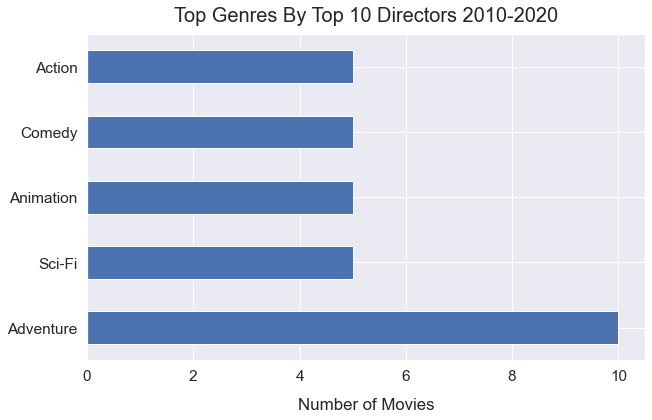

In [38]:
# Visualizing the top 10 genres by the top 10 directors 
sns.set(font_scale=1.4)
top10_director_avg['genres'].value_counts().plot(
        kind='barh', 
        figsize=(10, 6), 
        rot=0
    );

plt.xlabel("Number of Movies", labelpad=14)
plt.ylabel("", labelpad=14)
plt.title("Top Genres By Top 10 Directors 2010-2020", y=1.02, fontsize=20);

##### We see that these top directors make aventure and animation films the most. This confirms the results of the previous anlysis on genres. 

>On the other hand, we might not have enough data to draw any correlation between how many movies each director made and each of their profit. It was challenging to manipulate data through grouping by several elements in order to find a meaningful observation. 

>Perhaps, we could gather more data and provide a suggested list of potential dirctors for Microsoft's new movie studio.



### Business Question 4: How much should we spend on these films?

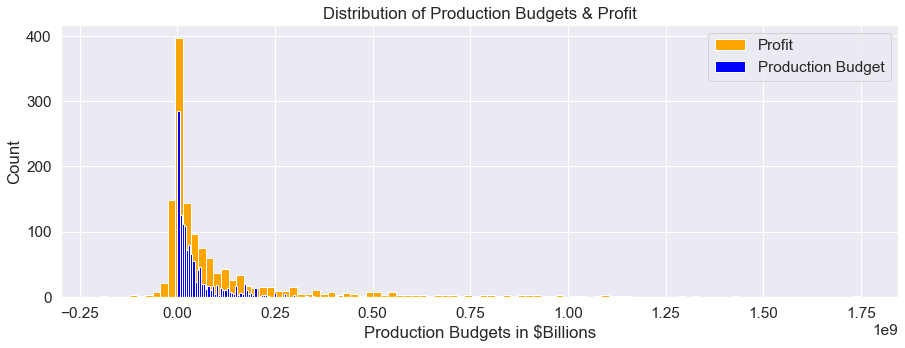

In [34]:
fig, ax = plt.subplots(figsize=(15,5))

ax.hist(
        x=df['profit'],
        bins=100,
        color='orange',
        alpha=1,
    );

ax.hist(
        x=df['production_budget'],
        bins=75,
        color='blue',
        alpha=1,
    );


ax.set_title('Distribution of Production Budgets & Profit')
ax.set_xlabel('Production Budgets in $Billions')
ax.set_ylabel('Count')
ax.legend(['Profit','Production Budget']);

>Does the size of the production budget of a film correlate to the total profit? When analyzing the distribution of the two characteristics of our data, a striking similarity can be found between the two distributions. In the cell below we run a pearson correlation coefficient between the two variables to inquire more about the relationship between the two

In [35]:
df[['production_budget','profit']].corr()

,production_budget,profit
production_budget,1.000000,0.658975
profit,0.658975,1.000000


>A pearson correlation coefficient of .659 is fairly high and indicates a solid positive correlation between the two variables

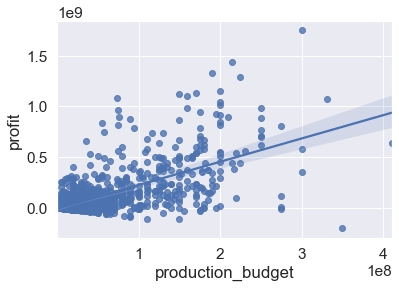

In [36]:
sns.regplot( 
        x=df['production_budget'],
        y=df['profit'],
        ci=99,
        label='Production Budget VS Profit',
    );

>A score of ~0.659 is a strong incation of a correlation between the amount of money spent and the amount of money made. 

In this section we analyzed whether or not there is a correlation between production budget and profit to decide if a studio should focus on producing fewer movies with higher production quality than to make more, lower budget films. Based on the appearance of a strong positive correlation between production budget and profit **we reccomend any studio looking to make large returns focus on producing fewer movies with higher production quality, taking a quality over quantity approach.**

## Summary of Findings



After intensive research we've been able to conclude the following information on films produced in the last 10 years:

> 1. The top 5 genres based on average ROI are: adventure, animation, muical, mystery, and sci-fi. From these films we can narrow our genres down to animation and adventure, because they show a consistent return over 0%.
> 2. Films should be released in foreign contries as well as domestically. On average foreign film gross and foreign film ROI are high than domestic. 
> 3. The top 10 directors in our dataframe tend to make films within the genres we suggested in question 1 - animation and adventure.
> 4. There is a positive correlation between production budget and profit, we suggest making a few high budget films as apposed to making many low budget films.

More research will need to be done on the characteristics that impact successful films, but from our preliminary research it's clear that the genre choice and the film's reach have a direct impact on success and must be considered when deciding which type of movies we will create.